## Project pt.2
Matej Magat, 0036541718

### Packages

In [476]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [477]:
from IPython.display import display
pd.set_option('future.no_silent_downcasting', True)

### 1. Load data

In [478]:
df = pd.read_csv("heart_disease_uci.csv")
df.head(8)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0


### 2. Data overview

In [479]:
def describe_feature(df, feature):
   data_type = df.dtypes[feature]
   
   if data_type in ["int64", "float64"]:  # Numerical feature
       stats_df = pd.DataFrame({
           'Metric': ['Feature Name', 'Data Type', 'Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
           'Value': [
               feature,
               data_type,
               df[feature].min(),
               df[feature].max(), 
               df[feature].mean(),
               df[feature].median(),
               df[feature].std()
           ]
       })
       
   elif data_type == "object" or df[feature].nunique() < 10:  # Categorical feature
       # Get frequency distribution
       freq_dist = df[feature].value_counts()
       
       # Create initial stats
       base_stats = pd.DataFrame({
           'Metric': ['Feature Name', 'Data Type', 'Number of Unique Values', 'Most Frequent Value', 'Most Frequent Count'],
           'Value': [
               feature,
               data_type,
               df[feature].nunique(),
               freq_dist.index[0],
               freq_dist.values[0]
           ]
       })
       
       # Create frequency distribution stats
       freq_stats = pd.DataFrame({
           'Metric': [f'Frequency: {val}' for val in freq_dist.index],
           'Value': freq_dist.values
       })
       
       # Combine both DataFrames
       stats_df = pd.concat([base_stats, freq_stats], ignore_index=True)
       
   else:
       stats_df = pd.DataFrame({
           'Metric': ['Feature Name', 'Message'],
           'Value': [feature, f"Unsupported data type: {data_type}"]
       })
   
   return stats_df

In [480]:
features = df.columns.tolist()
number_of_features = len(features)
number_of_examples = len(df)
print(f"Dataset features: {features}")
print("Goal variable: num\n")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {number_of_features}")
print(f"Number of examples: {number_of_examples}")

Dataset features: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Goal variable: num

Dataset shape: (920, 16)
Number of features: 16
Number of examples: 920


#### 2.1 Description of each dataset feature

In [481]:
for feature in features:
    description = describe_feature(df, feature)
    display(description)

,Metric,Value
0,Feature Name,id
1,Data Type,int64
2,Minimum,1
3,Maximum,920
4,Mean,460.5
5,Median,460.5
6,Standard Deviation,265.725422


,Metric,Value
0,Feature Name,age
1,Data Type,int64
2,Minimum,28
3,Maximum,77
4,Mean,53.51087
5,Median,54.0
6,Standard Deviation,9.424685


,Metric,Value
0,Feature Name,sex
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,Male
4,Most Frequent Count,726
5,Frequency: Male,726
6,Frequency: Female,194


,Metric,Value
0,Feature Name,dataset
1,Data Type,object
2,Number of Unique Values,4
3,Most Frequent Value,Cleveland
4,Most Frequent Count,304
5,Frequency: Cleveland,304
6,Frequency: Hungary,293
7,Frequency: VA Long Beach,200
8,Frequency: Switzerland,123


,Metric,Value
0,Feature Name,cp
1,Data Type,object
2,Number of Unique Values,4
3,Most Frequent Value,asymptomatic
4,Most Frequent Count,496
5,Frequency: asymptomatic,496
6,Frequency: non-anginal,204
7,Frequency: atypical angina,174
8,Frequency: typical angina,46


,Metric,Value
0,Feature Name,trestbps
1,Data Type,float64
2,Minimum,0.0
3,Maximum,200.0
4,Mean,132.132404
5,Median,130.0
6,Standard Deviation,19.06607


,Metric,Value
0,Feature Name,chol
1,Data Type,float64
2,Minimum,0.0
3,Maximum,603.0
4,Mean,199.130337
5,Median,223.0
6,Standard Deviation,110.78081


,Metric,Value
0,Feature Name,fbs
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,False
4,Most Frequent Count,692
5,Frequency: False,692
6,Frequency: True,138


,Metric,Value
0,Feature Name,restecg
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,normal
4,Most Frequent Count,551
5,Frequency: normal,551
6,Frequency: lv hypertrophy,188
7,Frequency: st-t abnormality,179


,Metric,Value
0,Feature Name,thalch
1,Data Type,float64
2,Minimum,60.0
3,Maximum,202.0
4,Mean,137.545665
5,Median,140.0
6,Standard Deviation,25.926276


,Metric,Value
0,Feature Name,exang
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,False
4,Most Frequent Count,528
5,Frequency: False,528
6,Frequency: True,337


,Metric,Value
0,Feature Name,oldpeak
1,Data Type,float64
2,Minimum,-2.6
3,Maximum,6.2
4,Mean,0.878788
5,Median,0.5
6,Standard Deviation,1.091226


,Metric,Value
0,Feature Name,slope
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,flat
4,Most Frequent Count,345
5,Frequency: flat,345
6,Frequency: upsloping,203
7,Frequency: downsloping,63


,Metric,Value
0,Feature Name,ca
1,Data Type,float64
2,Minimum,0.0
3,Maximum,3.0
4,Mean,0.676375
5,Median,0.0
6,Standard Deviation,0.935653


,Metric,Value
0,Feature Name,thal
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,normal
4,Most Frequent Count,196
5,Frequency: normal,196
6,Frequency: reversable defect,192
7,Frequency: fixed defect,46


,Metric,Value
0,Feature Name,num
1,Data Type,int64
2,Minimum,0
3,Maximum,4
4,Mean,0.995652
5,Median,1.0
6,Standard Deviation,1.142693


#### 2.2 Visualizing feature distributions

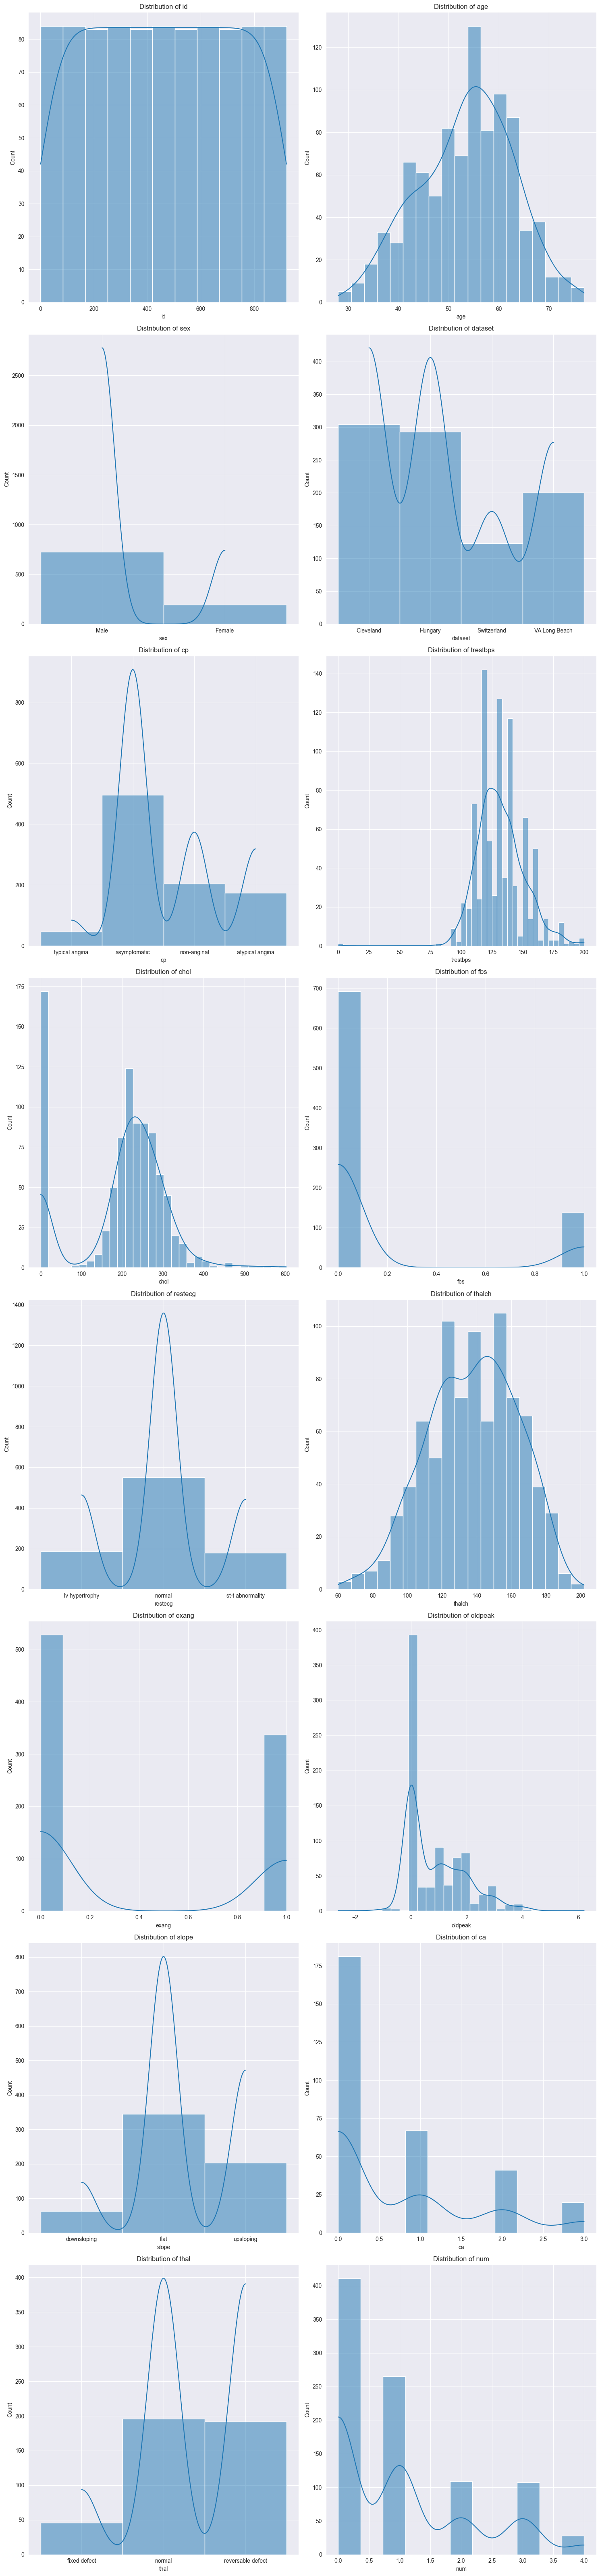

In [482]:
def plot_distribution(df, feature, ax=None):

   # If no axis is provided, create a new plot
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(df[feature], kde=True)
        ax.set_title(f'Distribution of {feature}')
        plt.show()
    else:
        sns.histplot(df[feature], kde=True, ax=ax)
        ax.set_title(f'Distribution of {feature}')
       
def plot_distributions(df):
    features_list = df.columns.tolist()
    num_features = len(features_list)
    if num_features % 2 == 0:
        y = num_features // 2
    else:
        y = num_features // 2 + 1
    x = 2
    fig, axes = plt.subplots(y, x, figsize=(15, 4*num_features))
    
    for i in range(y):
        for j in range(x):
            ax = axes[i, j]
            if len(features_list) > 0:
                plot_distribution(df, features_list.pop(0), ax)
        
    plt.tight_layout()
    plt.show()

plot_distributions(df)

#### 2.3 Fixing column "chol"

Column "chol" has a lot of zeros, which probably represent empty entries

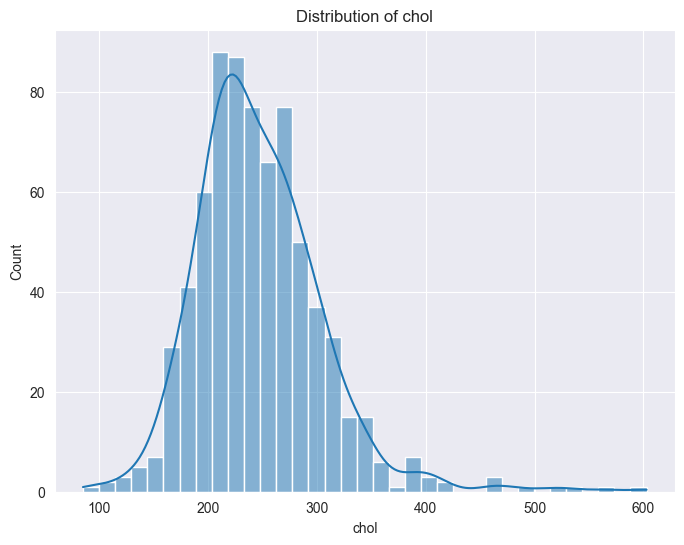

In [483]:
df["chol"] = df["chol"].replace(0, np.nan)
plot_distribution(df, feature="chol")

#### 2.4 Fixing column "oldpeak"
Column "oldpeak" has values < 0, which are not allowed and are probably a mistake

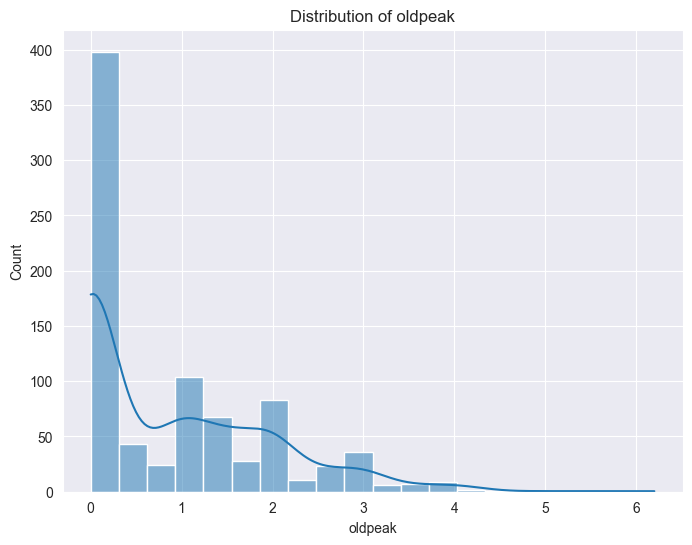

In [484]:
df["oldpeak"] = df["oldpeak"].apply(lambda x: np.nan if x < 0 else x)
plot_distribution(df, feature="oldpeak")

#### 2.5 Fixing column "trestbps"
It has some values that equal zero, which should not be possible

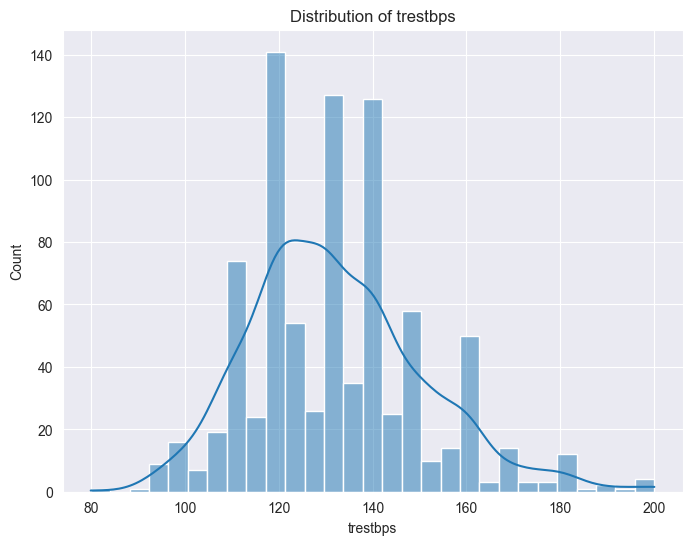

In [485]:
df["trestbps"] = df["trestbps"].replace(0, np.nan)
plot_distribution(df, feature="trestbps")

#### 2.6 Testing distributions of numeric columns

In [486]:
def test_distributions(df):
   numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
   results = []
   
   for column in numeric_columns:
       data = df[column].dropna()
       
       skewness = sp.stats.skew(data)
       kurtosis = sp.stats.kurtosis(data)
       
       k2_statistic, p_value = sp.stats.normaltest(data)
       is_normal = p_value > 0.05
       
       result = {
           "Feature": column,
           "Skewness": round(skewness, 3),
           "Kurtosis": round(kurtosis, 3),
           "K2_Statistic": round(k2_statistic, 3),
           "P_Value": round(p_value, 3),
           "Is_Normal": is_normal
       }
       results.append(result)
   
   results_df = pd.DataFrame(results)
   
   return results_df

In [487]:
test_distributions(df)

,Feature,Skewness,Kurtosis,K2_Statistic,P_Value,Is_Normal
0,id,0.000,-1.200,667.522,0.000,False
1,age,-0.196,-0.387,14.241,0.001,False
2,trestbps,0.629,0.620,58.306,0.000,False
3,chol,1.312,4.731,211.952,0.000,False
4,thalch,-0.211,-0.484,20.654,0.000,False
5,oldpeak,1.154,1.083,146.604,0.000,False
6,ca,1.160,0.177,49.144,0.000,False
7,num,0.967,-0.110,106.127,0.000,False


### 3. Turning categorical into numeric values

In [488]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.tolist() + ["num"]
# categorical_columns.append("num")
print(f"Categorical columns: {categorical_columns}")
numeric_columns = [e for e in df.columns if e not in categorical_columns]
print(f"Numeric columns: {numeric_columns}")

Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
Numeric columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


In [489]:
def categorical_encoder(df, columns=None):
    df_encoded = df.copy()
    
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category']).columns
    
    encoding_info = {}
    
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continue
        
        clean_series = df[col].dropna()
        
        unique_values = clean_series.astype(str).unique()
        
        mapping = {val: idx for idx, val in enumerate(sorted(unique_values))}
        
        value_counts = clean_series.value_counts()
        
        df_encoded[col] = df[col].astype(str).map(mapping).where(df[col].notna(), np.nan)
        
        encoding_info[col] = {
            'mapping': mapping,
            'inverse_mapping': {v: k for k, v in mapping.items()},
            'value_counts': value_counts.to_dict()
        }
    
    return df_encoded, encoding_info

def decode_categorical(df_encoded, encoding_info):
    df_decoded = df_encoded.copy()
    
    for col, info in encoding_info.items():
        df_decoded[col] = df_decoded[col].map(info['inverse_mapping']).where(df_decoded[col].notna(), np.nan)
    
    return df_decoded

def display_encoding_info(encoding_info):
    results = []
    
    for col, info in encoding_info.items():
        for val, count in info['value_counts'].items():
            result = {
                'Column': col,
                'Type': 'Value Distribution',
                'Original Value': val,
                'Encoded Value': info['mapping'][str(val)],  # Convert to string
                'Count': count
            }
            results.append(result)
        
        for original, encoded in info['mapping'].items():
            if str(original) not in [str(v) for v in info['value_counts'].keys()]:
                result = {
                    'Column': col,
                    'Type': 'Mapping Only',
                    'Original Value': original,
                    'Encoded Value': encoded,
                    'Count': 0  # No instances in the dataset
                }
                results.append(result)
    
    results_df = pd.DataFrame(results)
    
    results_df = results_df.sort_values(['Column', 'Count'], ascending=[True, False])
    
    display(results_df) 

In [490]:
df, encoding_details = categorical_encoder(df)
display_encoding_info(encoding_details)
df.head(8)

,Column,Type,Original Value,Encoded Value,Count
6,cp,Value Distribution,asymptomatic,0,496
7,cp,Value Distribution,non-anginal,2,204
8,cp,Value Distribution,atypical angina,1,174
9,cp,Value Distribution,typical angina,3,46
2,dataset,Value Distribution,Cleveland,0,304
3,dataset,Value Distribution,Hungary,1,293
4,dataset,Value Distribution,VA Long Beach,3,200
5,dataset,Value Distribution,Switzerland,2,123
15,exang,Value Distribution,False,0,528
16,exang,Value Distribution,True,1,337


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
5,6,56,1,0,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,1.0,0
6,7,62,0,0,0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,1.0,3
7,8,57,0,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,1.0,0


In [491]:
def update_cat_num_cols(column):
    if column in categorical_columns:
        print(f"deleted {column} from categorical columns")
        categorical_columns.remove(column)
    elif column in numeric_columns:
        print(f"deleted {column} from numeric columns")
        numeric_columns.remove(column)

### 4. Cleaning data

#### 4.1 Remove unimportant features

In [492]:
df.drop("dataset", axis=1, inplace=True)
update_cat_num_cols("dataset")

deleted dataset from categorical columns


#### 4.2 Remove constant and monotone features

In [493]:
const_columns = [column for column in df if df[column].nunique() == 1]
df.drop(const_columns, axis=1, inplace=True)

monotonous_columns = [column for column in df if df[column].is_monotonic_decreasing or df[column].is_monotonic_increasing]
df.drop(monotonous_columns, axis=1, inplace=True)

if const_columns:
    for column in const_columns:
        update_cat_num_cols(column)
    print(f"Dropped constant columns: {const_columns}")
else:
    print("There are no constant columns")
    
if monotonous_columns:
    for column in monotonous_columns:
        update_cat_num_cols(column)
    print(f"Dropped monotonous columns: {monotonous_columns}")
else:
    print("There are no monotonous columns")

There are no constant columns
deleted id from numeric columns
Dropped monotonous columns: ['id']


#### 4.3 (SKIPPED) Removing outliers

In [494]:
def count_outliers_iqr(df):
    outlier_counts = {}
    
    skewness = {}
    normality = {}
    for col in numeric_columns:
        non_null_data = df[col].dropna()
        skewness[col] = sp.stats.skew(non_null_data)
        k2_statistic, p_value = sp.stats.normaltest(non_null_data)
        is_normal = p_value > 0.05
        normality[col] = is_normal
    
    for column in numeric_columns:
        
        if not normality[column]:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
                
        else:
            z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
            outliers = df[z_scores > 3]
        
        outlier_counts[column] = {
                "count": len(outliers),
                "percentage": (len(outliers) / len(df)) * 100,
               # 'lower_bound': lower_bound,
               # 'upper_bound': upper_bound
            }
                
    outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index')
    
    print("Outlier Analysis:")
    for column, stats in outlier_counts.items():
        print(f"\n{column}:")
        print(f"  Outlier Count: {stats['count']}")
        print(f"  Outlier Percentage: {stats['percentage']:.2f}%")
        # print(f"  Lower Bound: {stats['lower_bound']:.2f}")
        # print(f"  Upper Bound: {stats['upper_bound']:.2f}")
    
    return outlier_df

In [495]:
def handle_row_outliers(df, outlier_threshold=0.3):
    df_processed = df.copy()
    
    def detect_outliers(series, method='iqr'):
        if method == 'iqr':
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return (series < lower_bound) | (series > upper_bound)
        
        elif method == 'zscore':
            z_scores = np.abs((series - series.mean()) / series.std())
            return z_scores > 3
    
    rows_to_keep = []
    
    skewness = {}
    normality = {}
    for col in numeric_columns:
        non_null_data = df[col].dropna()
        skewness[col] = sp.stats.skew(non_null_data)
        k2_statistic, p_value = sp.stats.normaltest(non_null_data)
        is_normal = p_value > 0.05
        normality[col] = is_normal
    
    for index, row in df_processed.iterrows():
        outlier_mask = {}
        
        for col in numeric_columns:
            if not normality[col]:
                outlier_mask[col] = detect_outliers(df_processed[col], method='iqr')
            else:
                outlier_mask[col] = detect_outliers(df_processed[col], method='zscore')
            
        
        outlier_count = sum(outlier_mask[col][index] for col in numeric_columns)
        total_numeric_features = len(numeric_columns)
        outlier_proportion = outlier_count / total_numeric_features
        
        if outlier_proportion <= outlier_threshold:
            for col in numeric_columns:
                if outlier_mask[col][index]:
                    if not normality[col]:
                        df_processed.at[index, col] = df_processed[col].median()
                    else:
                        df_processed.at[index, col] = df_processed[col].mean()
            rows_to_keep.append(index)
        
    
    initial_rows = len(df_processed)
    final_rows = len(rows_to_keep)
    
    print(f"Initial number of rows: {initial_rows}")
    print(f"Rows removed due to excessive outliers: {initial_rows - final_rows}")
    print(f"Percentage of rows removed: {((initial_rows - final_rows) / initial_rows) * 100:.2f}%")
    print(f"Final number of rows: {final_rows}")
    
    return df_processed.loc[rows_to_keep]


In [496]:
# outlier_summary = count_outliers_iqr(dataset)
# print(outlier_summary)
# plot_outliers(dataset)

In [497]:
# dataset = handle_row_outliers(dataset, outlier_threshold=0.3)

In [498]:
# outlier_summary = count_outliers_iqr(dataset)
# print(outlier_summary)

#### 4.4 Handling missing values

##### 4.4.1 Detecting rows with missing values

In [499]:
missing_percentages = (df.isna().sum(axis=1) / len(df.columns)) * 100
print(f"Missing percentages:\n {missing_percentages}")
threshold = 0.3
df = df.dropna(thresh=(1 - threshold) * len(df.columns))
print(f"Dataset length after removing rows with >{threshold * 100}% missing values: {len(df)}")
number_of_examples = len(df)

Missing percentages:
 0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
915    21.428571
916    50.000000
917    14.285714
918    50.000000
919    21.428571
Length: 920, dtype: float64
Dataset length after removing rows with >30.0% missing values: 853


##### 4.4.2 Detecting columns with missing values

In [500]:
print(f"Of {number_of_examples} values: ")
columns_to_fill = []
columns_to_remove = []

threshold = 50

missing_percentages = []
for feature in df.columns:
    number_of_missing = df[feature].isnull().sum()
    percentage_missing = number_of_missing / number_of_examples * 100
    if percentage_missing > 0 and percentage_missing < threshold:
        columns_to_fill.append(feature)
    elif percentage_missing >= threshold:
        columns_to_remove.append(feature)
    missing_percentages.append(percentage_missing)
    # print(f"   Feature: {feature}, missing values: {percentage_missing:.2f}%")

summary_df = pd.DataFrame({"Features": df.columns, "Missing Percentage": missing_percentages})
display(summary_df)
print(f"columns_to_fill: {columns_to_fill}")
print(f"columns_to_remove: {columns_to_remove}")

Of 853 values: 


,Features,Missing Percentage
0,age,0.000000
1,sex,0.000000
2,cp,0.000000
3,trestbps,0.468933
4,chol,20.750293
5,fbs,9.144197
6,restecg,0.117233
7,thalch,0.000000
8,exang,0.000000
9,oldpeak,1.055100


columns_to_fill: ['trestbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slope', 'thal']
columns_to_remove: ['ca']


In [501]:
for column in columns_to_remove:
    df.drop(column, axis=1, inplace=True)
    update_cat_num_cols(column)
df.head(2)

deleted ca from numeric columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0
1,67,1,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,1.0,2


##### 4.4.3 Imputing missing values

In [502]:
def impute_data(df):
    ds_copy = df.copy()
    
    for column in df.columns:
        if df[column].isna().sum() == 0:
            continue
            
        if column in categorical_columns:
            # Categorical columns - use mode
            impute_value = df[column].mode()[0]
            print(f"Mode imputation for {column} (categorical)")
            ds_copy[column] = ds_copy[column].fillna(impute_value)
        
        # Check column type
        elif pd.api.types.is_numeric_dtype(df[column]):
            non_null_data = df[column].dropna()
            k2_statistic, p_value = sp.stats.normaltest(non_null_data)
            is_normal = p_value > 0.05
            
            if not is_normal:
                # non normal data - use median
                impute_value = df[column].median()
                print(f"Median imputation for {column} (not normal, p-value: {p_value:.5f})")
            else:
                # normal data - use mean
                impute_value = df[column].mean()
                print(f"Mean imputation for {column} (normal, p-value: {p_value:.5f})")
            
            ds_copy[column] = ds_copy[column].fillna(impute_value)
    
    return ds_copy

In [503]:
print("Missing values before imputation:")
display(df.isna().sum())

df = impute_data(df)

print("\nMissing values after imputation:")
display(df.isna().sum())

Missing values before imputation:


age           0
sex           0
cp            0
trestbps      4
chol        177
fbs          78
restecg       1
thalch        0
exang         0
oldpeak       9
slope       251
thal        424
num           0
dtype: int64

Median imputation for trestbps (not normal, p-value: 0.00000)
Median imputation for chol (not normal, p-value: 0.00000)
Mode imputation for fbs (categorical)
Mode imputation for restecg (categorical)
Median imputation for oldpeak (not normal, p-value: 0.00000)
Mode imputation for slope (categorical)
Mode imputation for thal (categorical)

Missing values after imputation:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### 5. Normalization

In [504]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize(df):
    df_normalized = df.copy()
    
    normalization_info = {}
    
    for column in numeric_columns:
        data = df[column].dropna()
        
        k2_statistic, p_value = sp.stats.normaltest(data)
        is_normal = p_value > 0.05
        
        # Determine normalization method
        if is_normal:
            # For normally distributed data
            scaler = StandardScaler()
            normalized_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
            method = 'Standard (Z-score)'
        else:
            scaler = MinMaxScaler()
            normalized_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
            method = 'MinMax'
        
        df_normalized[column] = normalized_data
        normalization_info[column] = {
            'method': method,
            'is_normal': is_normal,
            'p_value': p_value
        }
    
    print("Feature Normalization Details:")
    for column, info in normalization_info.items():
        print(f"\n{column}:")
        print(f"  Normalization Method: {info['method']}")
        print(f"  Normally Distributed: {info['is_normal']}")
        print(f"  p-value: {info['p_value']:.4f}")
    
    return df_normalized, normalization_info

In [505]:
df, norm_info = normalize(df)

Feature Normalization Details:

age:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0029

trestbps:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

chol:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

thalch:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

oldpeak:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000


### 6. Final overview

#### 6.1 Dimensions of the cleaned dataset

In [506]:
print(f"Dataset dimensions: {df.shape}")
print(f"Numerical columns: {len(numeric_columns)}")
print(numeric_columns)
print(f"Categorical columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Goal variable: num")
df.head(8)

Dataset dimensions: (853, 13)
Numerical columns: 5
['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Categorical columns: 8
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
Goal variable: num


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.714286,1,3,0.541667,0.285714,1.0,0.0,0.633803,0.0,0.370968,0.0,0.0,0
1,0.795918,1,0,0.666667,0.388031,0.0,0.0,0.338028,1.0,0.241935,1.0,1.0,2
2,0.795918,1,0,0.333333,0.277992,0.0,0.0,0.485915,1.0,0.419355,1.0,2.0,1
3,0.183673,1,2,0.416667,0.318533,0.0,1.0,0.894366,0.0,0.564516,0.0,1.0,0
4,0.265306,0,1,0.416667,0.229730,0.0,0.0,0.788732,0.0,0.225806,2.0,1.0,0
5,0.571429,1,1,0.333333,0.291506,0.0,1.0,0.830986,0.0,0.129032,2.0,1.0,0
6,0.693878,0,0,0.500000,0.353282,0.0,0.0,0.704225,0.0,0.580645,0.0,1.0,3
7,0.591837,0,0,0.333333,0.519305,0.0,1.0,0.725352,1.0,0.096774,2.0,1.0,0


#### 6.2 Encoding info

In [507]:
display_encoding_info(encoding_details)

,Column,Type,Original Value,Encoded Value,Count
6,cp,Value Distribution,asymptomatic,0,496
7,cp,Value Distribution,non-anginal,2,204
8,cp,Value Distribution,atypical angina,1,174
9,cp,Value Distribution,typical angina,3,46
2,dataset,Value Distribution,Cleveland,0,304
3,dataset,Value Distribution,Hungary,1,293
4,dataset,Value Distribution,VA Long Beach,3,200
5,dataset,Value Distribution,Switzerland,2,123
15,exang,Value Distribution,False,0,528
16,exang,Value Distribution,True,1,337


#### 6.3 Normalization info

In [508]:
print("Feature Normalization Details:")
for column, info in norm_info.items():
    print(f"\n{column}:")
    print(f"  Normalization Method: {info['method']}")
    print(f"  Normally Distributed: {info['is_normal']}")
    print(f"  p-value: {info['p_value']:.4f}")

Feature Normalization Details:

age:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0029

trestbps:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

chol:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

thalch:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

oldpeak:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000


#### 6.4 Feature distributions

In [509]:
for column in numeric_columns:
        data = df[column]
        
        skewness = sp.stats.skew(data.dropna())
        kurtosis = sp.stats.kurtosis(data.dropna())
        
        k2_statistic, p_value = sp.stats.normaltest(data.dropna())
        is_normal = p_value > 0.05
        print(f"Column: {column}")
        print(f"Skewness: {skewness:.3f}")
        print(f"Kurtosis: {kurtosis:.3f}")
        print(f"D'Agostino-Pearson K^2 statistic: {k2_statistic:.3f}")
        print(f"P-Value: {p_value:.3f}, is normal: {is_normal}")
        print()

Column: age
Skewness: -0.179
Kurtosis: -0.376
D'Agostino-Pearson K^2 statistic: 11.681
P-Value: 0.003, is normal: False

Column: trestbps
Skewness: 0.650
Kurtosis: 0.668
D'Agostino-Pearson K^2 statistic: 61.690
P-Value: 0.000, is normal: False

Column: chol
Skewness: 1.606
Kurtosis: 7.188
D'Agostino-Pearson K^2 statistic: 330.191
P-Value: 0.000, is normal: False

Column: thalch
Skewness: -0.197
Kurtosis: -0.505
D'Agostino-Pearson K^2 statistic: 21.425
P-Value: 0.000, is normal: False

Column: oldpeak
Skewness: 1.171
Kurtosis: 1.138
D'Agostino-Pearson K^2 statistic: 151.849
P-Value: 0.000, is normal: False



##### 6.4.1 Visualization of the distributions

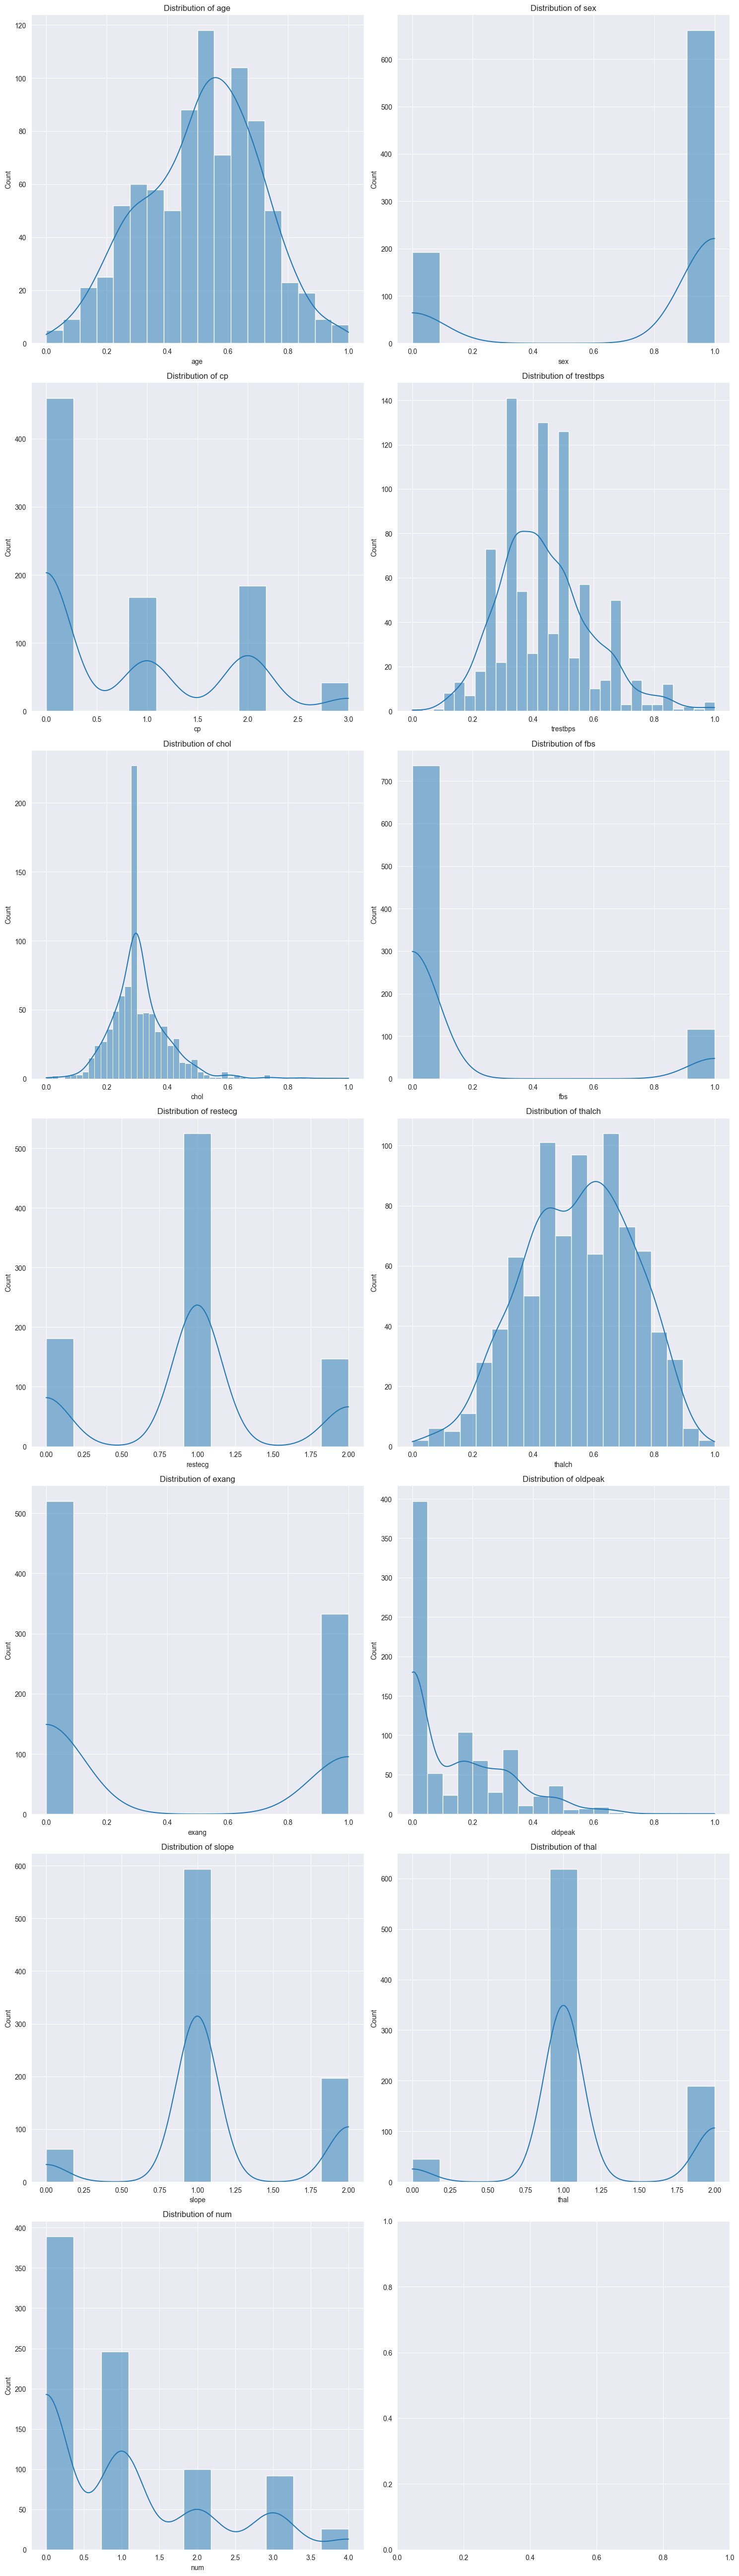

In [511]:
plot_distributions(df)

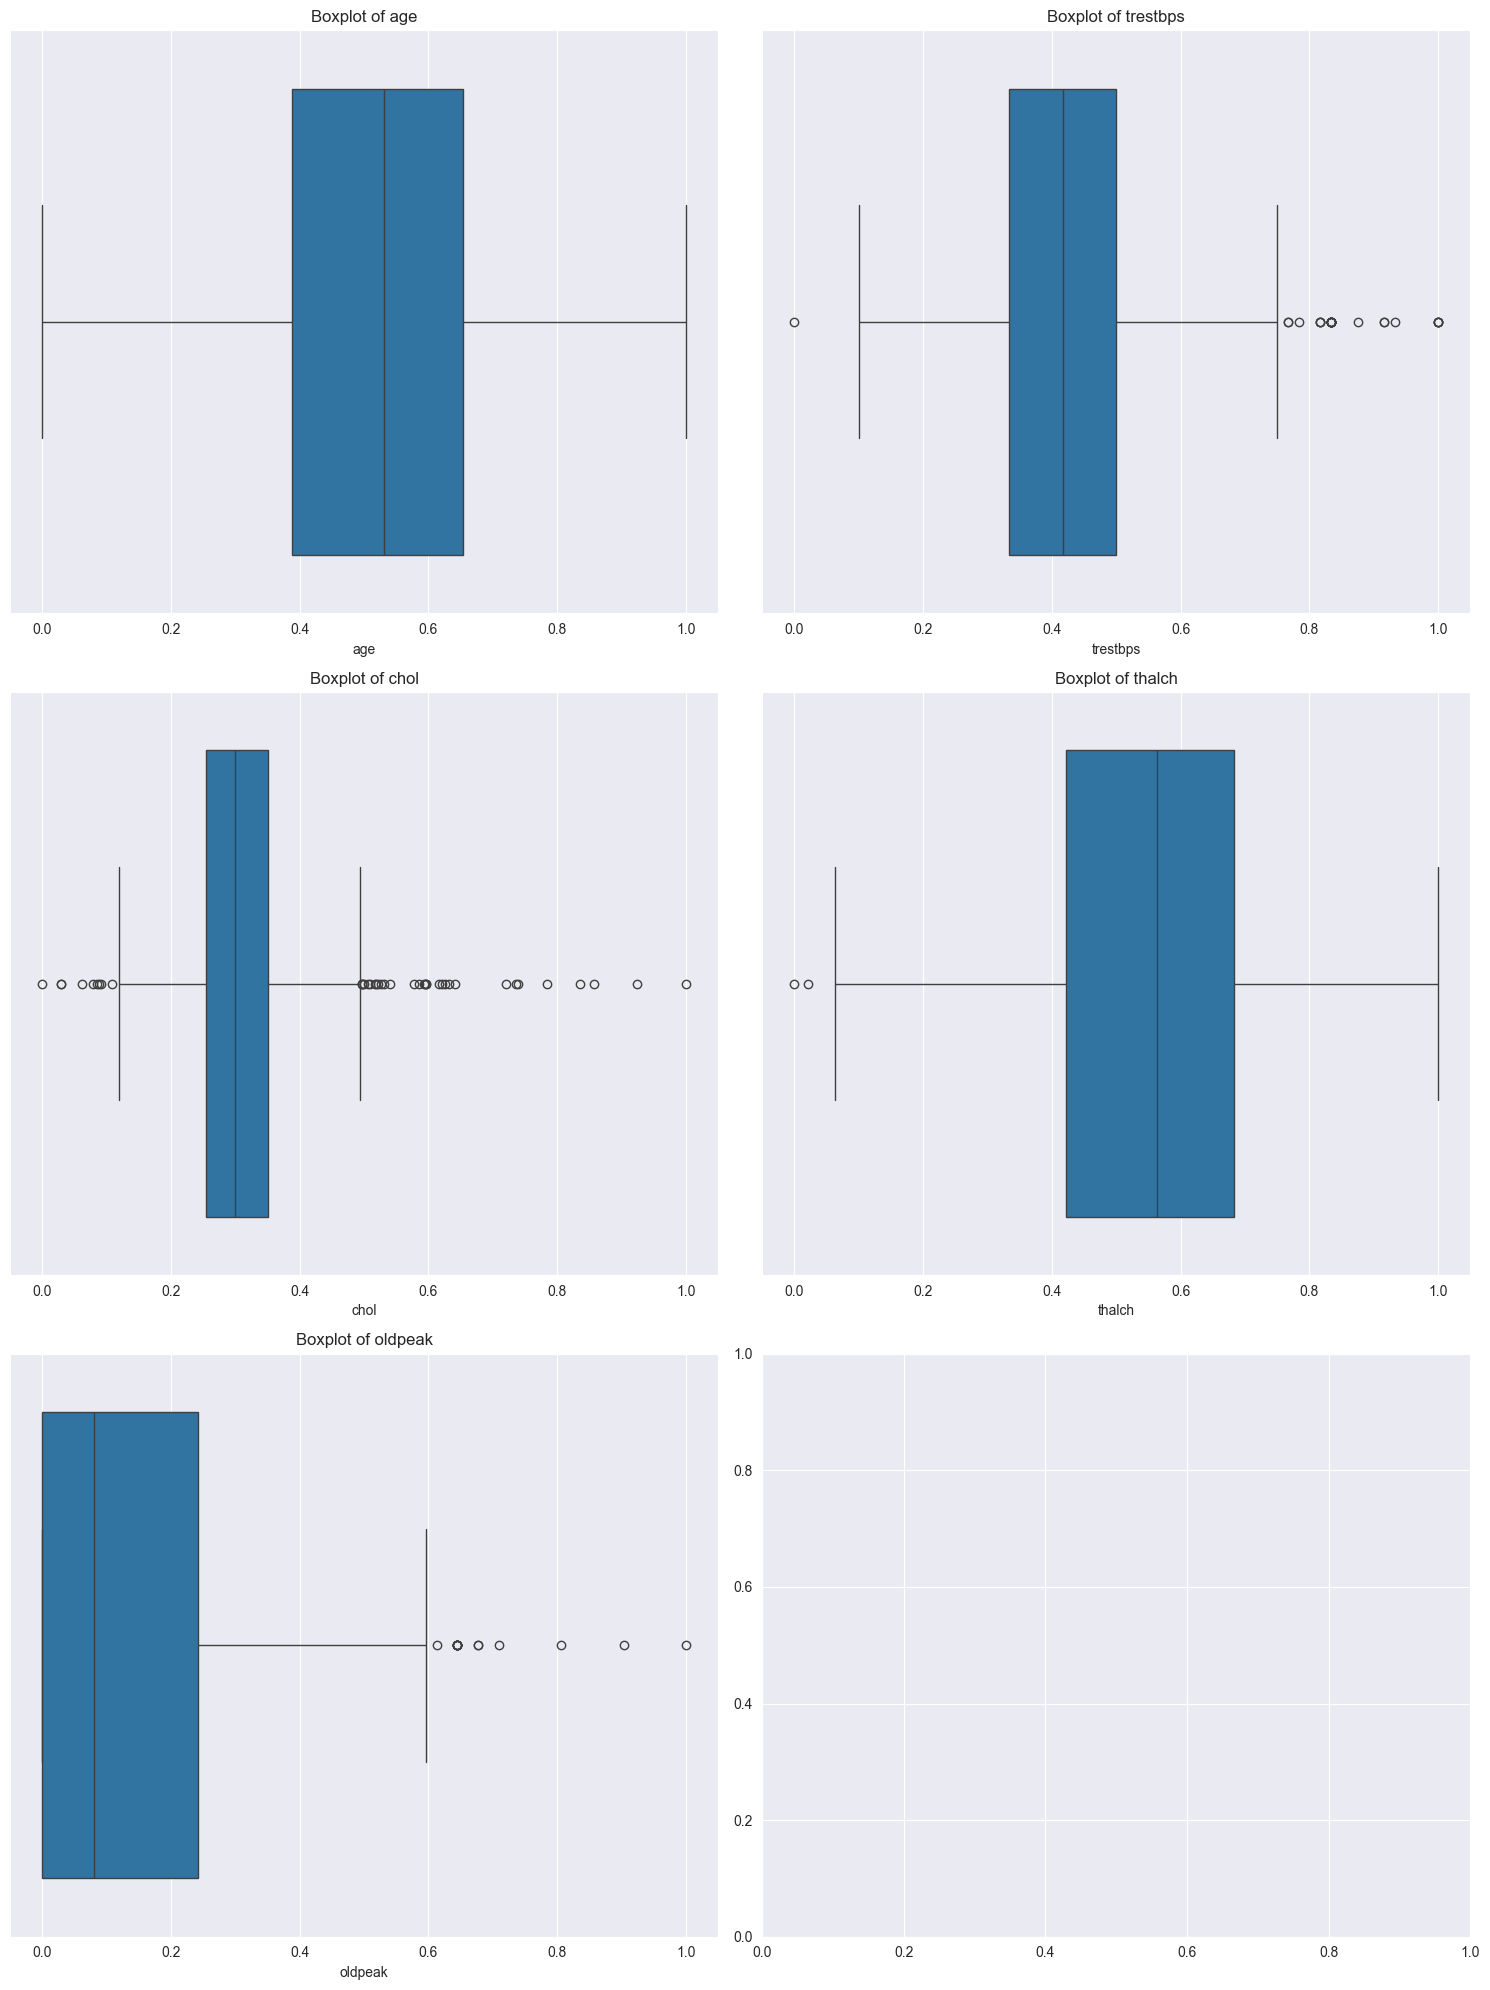

In [513]:
def plot_boxplot(df, feature, ax=None):
    # If no axis is provided, create a new plot
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(x=df[feature])
        ax.set_title(f'Boxplot of {feature}')
        plt.show()
    else:
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Boxplot of {feature}')

def plot_boxplots(df):
    features_list = numeric_columns
    num_features = len(features_list)
    if num_features % 2 == 0:
        y = num_features // 2
    else:
        y = num_features // 2 + 1
    x = 2
    fig, axes = plt.subplots(y, x, figsize=(15, 4*num_features))
    
    for i in range(y):
        for j in range(x):
            ax = axes[i, j]
            if len(features_list) > 0:
                plot_boxplot(df, features_list.pop(0), ax)
    
    plt.tight_layout()
    plt.show()
    
plot_boxplots(df)